In [18]:
# For data manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk

# To fetch financial data
import yfinance as yf

# For visualisation
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Set the ticker as 'EURUSD=X'
forex_data = yf.download('EURCHF=X', interval='1d', period="25y")

# Set the index to a datetime object
forex_data.index = pd.to_datetime(forex_data.index)

# Display the last five rows
forex_data.shape[0]

[*********************100%***********************]  1 of 1 completed


5162

In [19]:
forex_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5162.000000,5162.000000,5162.000000,5162.000000,5162.000000,5162.0
mean,1.293008,1.296083,1.289918,1.292968,1.292968,0.0
std,0.212936,0.213367,0.212542,0.212921,0.212921,0.0
min,0.948980,0.952470,0.864300,0.948980,0.948980,0.0
25%,1.093700,1.095912,1.091423,1.093770,1.093770,0.0
50%,1.217220,1.218930,1.215650,1.217250,1.217250,0.0
75%,1.535250,1.539075,1.531550,1.534975,1.534975,0.0
max,1.679100,1.682500,1.675200,1.679500,1.679500,0.0


In [20]:
forex_data_cleaned = forex_data.drop('Adj Close', axis=1)
forex_data_cleaned.columns = map(str.lower, forex_data_cleaned.columns)
forex_data_cleaned.to_csv('eurchf.csv')


In [12]:
forex_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0


In [13]:
forex_data[forex_data['Close']==forex_data['Adj Close']]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.723811,1.727205,1.718390,1.718597,1.718597,0
2003-12-02,1.719010,1.732112,1.717298,1.730313,1.730313,0
2003-12-03,1.730493,1.731812,1.725209,1.728101,1.728101,0
2003-12-04,1.727414,1.728997,1.718302,1.720697,1.720697,0
2003-12-05,1.720608,1.733102,1.719809,1.733102,1.733102,0
...,...,...,...,...,...,...
2022-12-08,1.221344,1.224665,1.215643,1.221240,1.221240,0
2022-12-09,1.223481,1.232347,1.222285,1.223601,1.223601,0
2022-12-12,1.223676,1.230012,1.221344,1.223915,1.223915,0


# Trying to get values of a day

In [134]:
# Set the ticker as 'EURUSD=X'
forex_train_data_day = yf.download('EURUSD=X', start="2022-10-20", end="2022-10-21", interval='2m')
forex_test_data_day = yf.download('EURUSD=X', start="2022-10-21", end="2022-10-22", interval='2m')

# Set the index to a datetime object
forex_train_data_day.index = pd.to_datetime(forex_train_data_day.index)
forex_test_data_day.index = pd.to_datetime(forex_test_data_day.index)


# Display the last five rows
print(forex_train_data_day.shape)
print(forex_test_data_day.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
(717, 6)
(672, 6)


In [128]:
forex_train_data_day.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-20 00:00:00,0.976944,0.976944,0.976753,0.976753,0.976753,0
2022-10-20 00:02:00,0.976753,0.976753,0.976658,0.976658,0.976658,0
2022-10-20 00:04:00,0.976562,0.976562,0.976562,0.976562,0.976562,0
2022-10-20 00:06:00,0.976658,0.976753,0.976658,0.976753,0.976753,0
2022-10-20 00:08:00,0.976562,0.976562,0.976562,0.976562,0.976562,0


In [129]:
forex_train_data_day.tail()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-10-20 23:50:00,0.978474,0.978474,0.978474,0.978474,0.978474,0
2022-10-20 23:52:00,0.978761,0.978761,0.978474,0.978474,0.978474,0
2022-10-20 23:54:00,0.978474,0.978474,0.978474,0.978474,0.978474,0
2022-10-20 23:56:00,0.978474,0.978569,0.978474,0.978569,0.978569,0
2022-10-20 23:58:00,0.978665,0.978665,0.978665,0.978665,0.978665,0


In [170]:
cleaned = forex_train_data_day.iloc[:, 0:4]
cleaned["last_mean_on_8"] = cleaned["Close"].rolling(window = 8).mean() - cleaned["Open"]
cleaned["next_mean_on_8"] = cleaned["Close"].iloc[::-1].rolling(window = 8).mean() - cleaned["Open"]
cleaned["max_on_8"] = cleaned["Close"].iloc[::-1].rolling(window = 8).max() - cleaned["Open"]
#cleaned = (cleaned-cleaned.mean())/cleaned.std()
cleaned = cleaned.dropna()
cleaned

,Open,High,Low,Close,last_mean_on_8,next_mean_on_8,max_on_8
Datetime,,,,,,,
2022-10-20 00:14:00,0.976658,0.976658,0.976562,0.976562,-0.000012,0.000072,0.000477
2022-10-20 00:16:00,0.976562,0.976562,0.976467,0.976467,0.000048,0.000215,0.000573
2022-10-20 00:18:00,0.976562,0.976562,0.976562,0.976562,0.000036,0.000227,0.000573
2022-10-20 00:20:00,0.976658,0.976753,0.976658,0.976753,-0.000036,0.000143,0.000477
2022-10-20 00:22:00,0.976849,0.977135,0.976849,0.977135,-0.000179,-0.000072,0.000286
...,...,...,...,...,...,...,...
2022-10-20 23:36:00,0.978665,0.978761,0.978665,0.978761,0.000060,-0.000144,0.000096
2022-10-20 23:38:00,0.978474,0.978474,0.978474,0.978474,0.000215,0.000012,0.000191
2022-10-20 23:40:00,0.978474,0.978474,0.978474,0.978474,0.000180,0.000012,0.000191


In [171]:
cleaned_test = forex_test_data_day.iloc[:, 0:4]
cleaned_test["last_mean_on_8"] = cleaned_test["Close"].rolling(window = 8).mean() - cleaned_test["Open"]
cleaned_test["next_mean_on_8"] = cleaned_test["Close"].iloc[::-1].rolling(window = 8).mean() - cleaned_test["Open"]
cleaned_test["max_on_8"] = cleaned_test["Close"].iloc[::-1].rolling(window = 8).max() - cleaned_test["Open"]
#cleaned_test = (cleaned_test-cleaned_test.mean())/cleaned_test.std()
cleaned_test = cleaned_test.dropna()
cleaned_test

,Open,High,Low,Close,last_mean_on_8,next_mean_on_8,max_on_8
Datetime,,,,,,,
2022-10-21 00:14:00,0.978091,0.978091,0.978091,0.978091,0.000156,-0.000096,0.000191
2022-10-21 00:16:00,0.978091,0.978282,0.978091,0.978282,0.000132,-0.000120,0.000191
2022-10-21 00:18:00,0.977995,0.978186,0.977995,0.978186,0.000203,-0.000072,0.000191
2022-10-21 00:20:00,0.978091,0.978091,0.978091,0.978091,0.000084,-0.000203,0.000000
2022-10-21 00:22:00,0.977995,0.977995,0.977995,0.977995,0.000155,-0.000120,0.000000
...,...,...,...,...,...,...,...
2022-10-21 22:06:00,0.986193,0.986193,0.986193,0.986193,0.000122,0.000000,0.000000
2022-10-21 22:08:00,0.986193,0.986193,0.986193,0.986193,0.000085,0.000000,0.000000
2022-10-21 22:10:00,0.986193,0.986193,0.986193,0.986193,0.000049,0.000000,0.000000


<AxesSubplot:>

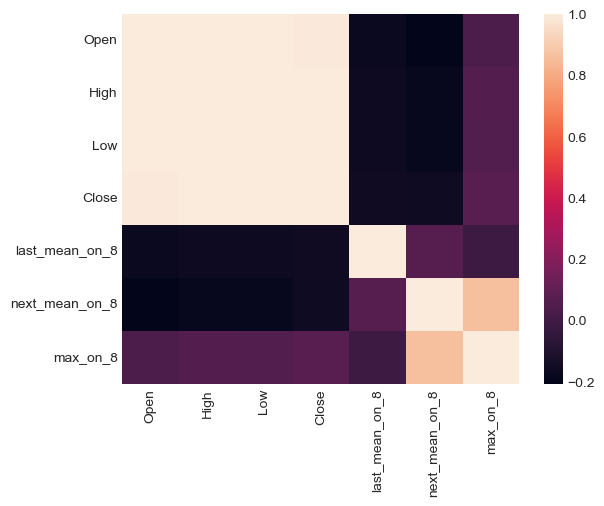

In [172]:
df = cleaned.corr(method='pearson', min_periods=1)
sns.heatmap(df, 
        xticklabels=df.columns,
        yticklabels=df.columns)

# MODEL

In [143]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error


In [173]:
y_train = cleaned.next_mean_on_8.values
X_train = cleaned.iloc[:, 0:5].values
y_test = cleaned_test.next_mean_on_8.values
X_test = cleaned.iloc[:, 0:5].values

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
print(regr.coef_)
print(regr.intercept_)
prediction = regr.predict(X_test)
print(prediction)
#print(mean_absolute_error(prediction, y_test))


[-0. -0. -0. -0.  0.]
4.766039963636765e-06
[4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996e-06 4.76603996e-06
 4.76603996e-06 4.76603996e-06 4.76603996